Array Manipulations

1.Form the 2-D array (without typing it in explicitly):
[[1,  6, 11],
 [2,  7, 12],
 [3,  8, 13],
 [4,  9, 14],
[5, 10, 15]]

In [ ]:
import numpy as np
a=np.arange(1,16).reshape(3,5)
a=np.stack((a), axis=-1)
a

array([[ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14],
       [ 5, 10, 15]])

and generate a new array containing its 2nd and 4th rows.


In [ ]:
b =(a[[1, 3], :])
b

array([[ 2,  7, 12],
       [ 4,  9, 14]])

2.Divide each column of the array:

import numpy as np
a = np.arange(25).reshape(5, 5)
elementwise with the array b = np.array([1., 5, 10, 15, 20]).

In [ ]:
a = np.arange(25).reshape(5, 5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
b = np.array([1., 5, 10, 15, 20])
b

array([ 1.,  5., 10., 15., 20.])

In [ ]:
c = a/b[np.newaxis, :]
c

array([[ 0.        ,  0.2       ,  0.2       ,  0.2       ,  0.2       ],
       [ 5.        ,  1.2       ,  0.7       ,  0.53333333,  0.45      ],
       [10.        ,  2.2       ,  1.2       ,  0.86666667,  0.7       ],
       [15.        ,  3.2       ,  1.7       ,  1.2       ,  0.95      ],
       [20.        ,  4.2       ,  2.2       ,  1.53333333,  1.2       ]])

3.Harder one: Generate a 10 x 3 array of random numbers (in range [0,1]). For each row, pick the number closest to 0.5.

Use abs and argsort to find the column j closest for each row.
Use fancy indexing to extract the numbers. 

In [ ]:
d = np.random.rand(10,3)
d

array([[0.15156601, 0.40660606, 0.67966706],
       [0.58408418, 0.68591671, 0.81800099],
       [0.9769679 , 0.14240529, 0.42780971],
       [0.56707621, 0.05613341, 0.88642623],
       [0.29759781, 0.55496412, 0.51878577],
       [0.77596335, 0.54790956, 0.84280763],
       [0.85228454, 0.19340371, 0.74021442],
       [0.52643124, 0.46361817, 0.21819801],
       [0.74162505, 0.88250109, 0.80091013],
       [0.59372087, 0.29879238, 0.70638364]])

Picture manipulation: Framing a Face

i) Ellipsoid mask

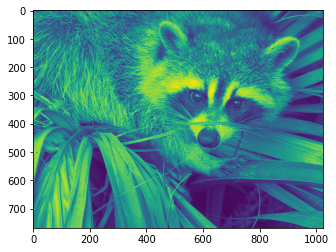

In [ ]:
from scipy import misc
face = misc.face(gray=True)
import matplotlib.pyplot as plt
face = misc.face(gray=True)
plt.imshow(face)

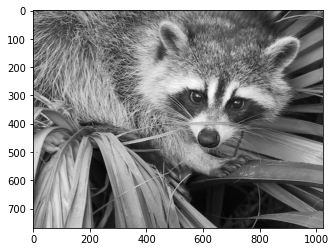

In [ ]:
plt.imshow(face, cmap=plt.cm.gray)

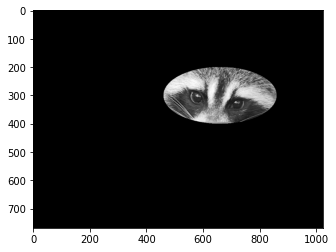

In [ ]:
sy, sx = face.shape
y, x = np.ogrid[0:sy, 0:sx] # x and y indices of pixels
y.shape, x.shape

h, k = (660, 300) ##from the centre
mask = (((x-h)**2)/40000 + ((y-k)**2)/10000) >=1 ##ellipse equation with a=200, b=100
face[mask] = 0
plt.imshow(face, cmap=plt.cm.gray)

### **Data statistics**

--2020-07-23 12:45:37--  http://www.scipy-lectures.org/_downloads/populations.txt
Resolving www.scipy-lectures.org (www.scipy-lectures.org)... 217.70.184.50
Connecting to www.scipy-lectures.org (www.scipy-lectures.org)|217.70.184.50|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://scipy-lectures.org/_downloads/populations.txt [following]
--2020-07-23 12:45:37--  http://scipy-lectures.org/_downloads/populations.txt
Resolving scipy-lectures.org (scipy-lectures.org)... 185.199.108.153, 185.199.111.153, 185.199.109.153, ...
Connecting to scipy-lectures.org (scipy-lectures.org)|185.199.108.153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 525 [text/plain]
Saving to: ‘populations.txt.1’

populations.txt.1   100%[===================>]     525  --.-KB/s    in 0s      

2020-07-23 12:45:37 (79.4 MB/s) - ‘populations.txt.1’ saved [525/525]



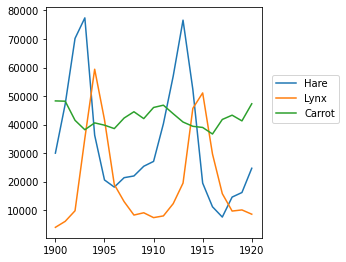

In [ ]:
!wget http://www.scipy-lectures.org/_downloads/populations.txt
data = np.loadtxt('populations.txt')
year, hares, lynxes, carrots = data.T  # trick: columns to variables

import matplotlib.pyplot as plt
plt.axes([0.2, 0.1, 0.5, 0.8]) 

plt.plot(year, hares, year, lynxes, year, carrots) 

plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5))

a. The median and 75th percentile of the populations of each species for the years in the period.

In [ ]:
data

array([[ 1900., 30000.,  4000., 48300.],
       [ 1901., 47200.,  6100., 48200.],
       [ 1902., 70200.,  9800., 41500.],
       [ 1903., 77400., 35200., 38200.],
       [ 1904., 36300., 59400., 40600.],
       [ 1905., 20600., 41700., 39800.],
       [ 1906., 18100., 19000., 38600.],
       [ 1907., 21400., 13000., 42300.],
       [ 1908., 22000.,  8300., 44500.],
       [ 1909., 25400.,  9100., 42100.],
       [ 1910., 27100.,  7400., 46000.],
       [ 1911., 40300.,  8000., 46800.],
       [ 1912., 57000., 12300., 43800.],
       [ 1913., 76600., 19500., 40900.],
       [ 1914., 52300., 45700., 39400.],
       [ 1915., 19500., 51100., 39000.],
       [ 1916., 11200., 29700., 36700.],
       [ 1917.,  7600., 15800., 41800.],
       [ 1918., 14600.,  9700., 43300.],
       [ 1919., 16200., 10100., 41300.],
       [ 1920., 24700.,  8600., 47300.]])

In [ ]:
print ("Median of Hares:", np.median(hares))
print ("Median of Lynx:", np.median(lynxes))
print ("Median of Carrots:", np.median(carrots))

Median of Hares: 25400.0
Median of Lynx: 12300.0
Median of Carrots: 41800.0


In [ ]:
print ("75th percentile for Hares:", np.percentile(hares,75, axis=0))
print ("75th percentile for Lynx:", np.percentile(lynxes,75, axis=0))
print ("75th percentile for Carrots:", np.percentile(carrots,75, axis=0))

75th percentile for Hares: 47200.0
75th percentile for Lynx: 29700.0
75th percentile for Carrots: 44500.0


b. The histogram of hare population with bins [0, 25000, 50000, 75000, 100000]


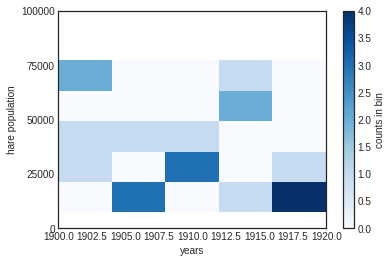

In [ ]:

plt.hist2d(year,hares, bins=5, cmap='Blues')
plt.yticks([0, 25000, 50000, 75000, 100000])
plt.xlabel('years')
plt.ylabel('hare population')
cb = plt.colorbar()
cb.set_label('counts in bin')


c.Which years did the population of each species drop the most from the previous year? 

In [ ]:
data1 = data[:,1:] 
e= np.diff(data1, axis=0)
e

array([[ 17200.,   2100.,   -100.],
       [ 23000.,   3700.,  -6700.],
       [  7200.,  25400.,  -3300.],
       [-41100.,  24200.,   2400.],
       [-15700., -17700.,   -800.],
       [ -2500., -22700.,  -1200.],
       [  3300.,  -6000.,   3700.],
       [   600.,  -4700.,   2200.],
       [  3400.,    800.,  -2400.],
       [  1700.,  -1700.,   3900.],
       [ 13200.,    600.,    800.],
       [ 16700.,   4300.,  -3000.],
       [ 19600.,   7200.,  -2900.],
       [-24300.,  26200.,  -1500.],
       [-32800.,   5400.,   -400.],
       [ -8300., -21400.,  -2300.],
       [ -3600., -13900.,   5100.],
       [  7000.,  -6100.,   1500.],
       [  1600.,    400.,  -2000.],
       [  8500.,  -1500.,   6000.]])

In [ ]:
print("Population drop years for hares, lynxes, carrots are", year[np.argmax(np.abs(e), axis=0) + 1])

Population drop years for hares, lynxes, carrots are [1904. 1914. 1902.]


## Scikit Learn

a. Choose some numerical feature that you feel might be related to a diagnosis of malignant (vs benign)

In [ ]:
import scipy as sc
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
BC = load_breast_cancer()
df = pd.DataFrame(data=BC.data, columns=BC.feature_names)
df.head(5)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


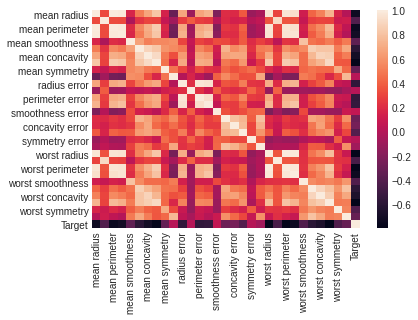

In [ ]:
df['Target'] = data.target
df['Target_names'] = data.target
df.loc[(df.Target_names == 0),'Target_names']='malignant'
df.loc[(df.Target_names == 1),'Target_names']='benign'
sns.heatmap(df.corr())

I would choose 'mean radius' and 'mean smoothness' due to their higher correlation with target and also theoretically  size and smoothness plays a major role too. 

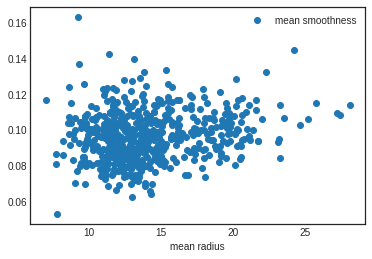

In [ ]:
df.plot(x='mean radius', y='mean smoothness', style=['o','rx'])

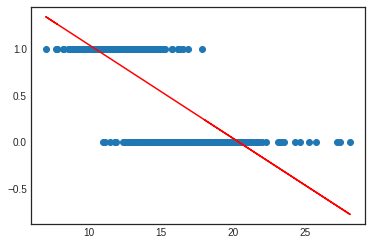

In [ ]:
from sklearn.linear_model import LinearRegression
A= df['mean radius'].to_numpy().reshape(-1, 1)
B= df['Target'].to_numpy().reshape(-1, 1)
lreg = LinearRegression()
lreg.fit(A, B)
pred = lreg.predict(A)
plt.scatter(A, B)
plt.plot(A, pred, color='red')
plt.show()